# Pesos das Variáveis

## Import de dependências

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://git.neoway.io/api/v4/projects/273/packages/pypi/simple
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 972.6/972.6 kB 15.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Imports
import subprocess
import time
from functools import reduce

# Data Viz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import shap

# Scipy e Sklearn
from scipy.stats import mannwhitneyu, ttest_ind
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_text, plot_tree

# PySpark
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import DataFrame
from pyspark.sql import functions as sf
from pyspark.sql.functions import col, lit, when
from pyspark.sql.types import DoubleType, IntegerType
from pyspark.sql.window import Window

# Feature Store
from feature_store import Catalog, FeatureStore

## Feature Store

In [ ]:
fs = FeatureStore(spark)

You are currently in the PROD environment.


In [ ]:
catalog = fs.get_catalog()

## Import dos Dados - Baixa Renda

In [ ]:
dataset = spark.read.parquet('gs://oculto/loss_prevention/perfil_laranja/data/baixa_renda_nn.parquet')

In [ ]:
dataset.printSchema()

root
 |-- flagBeneficiarioBPC: integer (nullable = true)
 |-- flagVulneravelBPC: integer (nullable = true)
 |-- flagBeneficiarioSeguroDefeso: integer (nullable = true)
 |-- flagBeneficiarioGarantiaSafra: integer (nullable = true)
 |-- flagBeneficiarioNovoBolsaFamilia: integer (nullable = true)
 |-- flagBeneficiarioProgramasSociais: integer (nullable = true)
 |-- flagAltaQualificacaoBeneficiarioProgramasSociais: integer (nullable = true)
 |-- indicioFalecimento: integer (nullable = true)
 |-- flagFalecidoConfirmado: integer (nullable = true)
 |-- flagSupercentenario: integer (nullable = true)
 |-- flagAdolescente: integer (nullable = true)
 |-- flagIdoso: integer (nullable = true)
 |-- flagEmpresario: integer (nullable = true)
 |-- flagAltaQualificacao: integer (nullable = true)
 |-- flagServidorPublico: integer (nullable = true)
 |-- flagRegistroAntt: integer (nullable = true)
 |-- flagProdutorRural: integer (nullable = true)
 |-- quantidadeCandidatosApoiados: long (nullable = true)
 |

In [ ]:
dataset.count()

86175212

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
dataset.limit(5).toPandas()

,flagBeneficiarioBPC,flagVulneravelBPC,flagBeneficiarioSeguroDefeso,flagBeneficiarioGarantiaSafra,flagBeneficiarioNovoBolsaFamilia,flagBeneficiarioProgramasSociais,flagAltaQualificacaoBeneficiarioProgramasSociais,indicioFalecimento,flagFalecidoConfirmado,flagSupercentenario,flagAdolescente,flagIdoso,flagEmpresario,flagAltaQualificacao,flagServidorPublico,flagRegistroAntt,flagProdutorRural,quantidadeCandidatosApoiados,quantidadeEleicoesComoDoador,valorMedioDoado,valorTotalDoado,quantidadeDoacoesDescricaoNaoEspecificada,valorMaximoDoado,quantidadeDoacoesPoliticas,flagContratoPublicoBeneficiarioProgramasSociais,flagLaranja,quantidadeEmails,quantidadeEmailPadraoSuspeito,quantidadeEmailNaoConsistenteNomeTitular,flagAreaUrbanaBaixaDensidadeEdificios,flagAglomeradoRural,flagAreaRural,flagFavelaOuComunidadeUrbana,flagDividaDauCresceu180Dias,valorTotalDividasDau,qtdVeiculosFinanciados,qtdFinanciamentosVeicularesQuitados,historicoAtrasoFinanciamentoVeicular,recorrenciaFinanciamentoVeicular,RecorrenciaFinanciamentoMaioridade,flagFinanciamentoImobiliarioAltoValorBeneficiario,flagFinanciamentoImobiliarioAltoValorRenda,quantidadeRestituicaoIrpfObservadas,quantidadeDeclaracoesIrpfObservadas,flagAlterouBancoDeclaracaoIrpfUltimos5Anos,ativosComCota,ativosComCotaPercentual,ativosSemCota,bancarizacao,bancarizacaoBest,bancarizacaoFaixa,diversificacao,diversificacaoBest,diversificacaoFaixa,evolucaoPatrimonio,patrimonio,perfilInvestidor,flagSocioProcessoJudicialLavagemDinheiro,flagProcessoJudicialCorrupcao,flagProcessoJudicialLavagem,flagProcessoJudicialFraude,flagProcessoJudicialRouboFurtos,flagSocioProcessoJudicialFraude,flagProcessoJudicialCobranca,flagSocioProcessoJudicialCorrupcao,flagSocioProcessoJudicialTributario,quantidadeDuplaIdentidadeNomeDataNascimento,flagDuplaIdentidadeNomeDataNascimento,quantidadeDuplaIdentidadeNomeMae,flagDuplaIdentidadeNomeMae,quantidadeDuplaIdentidadeCpfMae,flagDuplaIdentidadeCpfMae,quantidadeIndicioForteDuplaIdentidade,flagIndicioForteDuplaIdentidade,qtdImoveis,valorTotal,flagTop10ValorImoveisRenda,flagTop5ValorImoveisRenda,flagTop1ValorImoveisRenda,flagTop10AltoValorImoveisBeneficiario,flagTop5AltoValorImoveisBeneficiario,flagTop1AltoValorImoveisBeneficiario,quantidadeVeiculosPesados,quantidadeVeiculosPesadosAnoFabricacaoEntre0E4AnosAtras,quantidadeVeiculosPesadosAnoFabricacaoEntre5E9AnosAtras,quantidadeVeiculosPesadosAnoFabricacaoEntre10E14AnosAtras,valorAreaTotalPropriedadesRurais,quantidadePropriedades,quantidadePropriedadesAtivas,flagOperadorAeronave,flagProprietarioAeronave,quantidadeAeronaves,quantidadeRelacionamentos,flagPrimeiroGrauProcessoJudicialCorrupcao,flagPrimeiroGrauProcessoJudicialLavagem,flagPrimeiroGrauProcessoJudicialFraude,flagPrimeiroGrauProcessoJudicialRouboFurtos,flagPrimeiroGrauProcessoJudicialCobranca,flagSegundoGrauProcessoJudicialCorrupcao,flagSegundoGrauProcessoJudicialLavagem,flagSegundoGrauProcessoJudicialFraude,flagSegundoGrauProcessoJudicialRouboFurtos,flagSegundoGrauProcessoJudicialCobranca,flagRendaSemInformacao,flagBaixaRenda,flagMediaRenda,flagAltaRenda,flagSocioDuplaId,quantidadeMediaEmpresasMesmoCnaeAbertas12Meses,flagSocioEmpresasGrandePorte,flagSocioEmpresasEPP,flagSocioBeneficiarioProgramaSocial,flagSocioClasseEmpresaFachadaALTA,flagSocioClasseEmpresaFachadaMUITOALTA,flagSocioClasseEmpresaFachadaMEDIO,quantidadeTelefones
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,-1,-1,0.0,0,0,0,5,0,17,0,-1,3,1,1,4,1,NaN,2,17,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0,0,0,0,0,0,2
1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0,0,0,1,0,1,1,0,0,0,0,0.0,0,0,-1,-1,0.0,0,0,0,3,0,-1,0,-1,-1,-1,-1,0,0,0.0,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0,0,0,0,0,0,3
2,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0.0,0,0,-1,-1,0.0,0,0,0,3,0,-1,0,-1,-1,-1,-1,0,0,0.0,-1,-1,0,0,0,0,0,

## Criar Features

In [ ]:
dataset_original = dataset
dataset = dataset.sample(False, 0.05, seed=42)

In [ ]:
for column in dataset.columns:
    dataset = dataset.withColumn(column, col(column).cast(DoubleType()))

dataset = dataset.fillna(0)

In [ ]:
feature_cols = [
    "flagBeneficiarioBPC", "flagVulneravelBPC", "flagBeneficiarioSeguroDefeso", "flagBeneficiarioGarantiaSafra",
    "flagBeneficiarioNovoBolsaFamilia", "flagBeneficiarioProgramasSociais", "flagAltaQualificacaoBeneficiarioProgramasSociais",
    "indicioFalecimento", "flagFalecidoConfirmado", "flagSupercentenario", "flagAdolescente", "flagIdoso",
    "flagEmpresario", "flagAltaQualificacao", "flagServidorPublico", "flagRegistroAntt", "flagProdutorRural",
    "quantidadeCandidatosApoiados", "quantidadeEleicoesComoDoador", "valorMedioDoado", "valorTotalDoado",
    "quantidadeDoacoesDescricaoNaoEspecificada", "valorMaximoDoado", "quantidadeDoacoesPoliticas",
    "flagContratoPublicoBeneficiarioProgramasSociais", "flagLaranja", "quantidadeEmails", "quantidadeEmailPadraoSuspeito",
    "quantidadeEmailNaoConsistenteNomeTitular", "flagAreaUrbanaBaixaDensidadeEdificios", "flagAglomeradoRural",
    "flagAreaRural", "flagFavelaOuComunidadeUrbana", "flagDividaDauCresceu180Dias", "valorTotalDividasDau",
    "qtdVeiculosFinanciados", "qtdFinanciamentosVeicularesQuitados", "historicoAtrasoFinanciamentoVeicular",
    "recorrenciaFinanciamentoVeicular", "RecorrenciaFinanciamentoMaioridade", "flagFinanciamentoImobiliarioAltoValorBeneficiario",
    "flagFinanciamentoImobiliarioAltoValorRenda", "quantidadeRestituicaoIrpfObservadas", "quantidadeDeclaracoesIrpfObservadas",
    "flagAlterouBancoDeclaracaoIrpfUltimos5Anos", "ativosComCota", "ativosComCotaPercentual", "ativosSemCota",
    "bancarizacao", "bancarizacaoBest", "bancarizacaoFaixa", "diversificacao", "diversificacaoBest", "diversificacaoFaixa",
    "evolucaoPatrimonio", "patrimonio", "perfilInvestidor", "flagSocioProcessoJudicialLavagemDinheiro",
    "flagProcessoJudicialCorrupcao", "flagProcessoJudicialLavagem", "flagProcessoJudicialFraude", "flagProcessoJudicialRouboFurtos",
    "flagSocioProcessoJudicialFraude", "flagProcessoJudicialCobranca", "flagSocioProcessoJudicialCorrupcao",
    "flagSocioProcessoJudicialTributario", "quantidadeDuplaIdentidadeNomeDataNascimento", "flagDuplaIdentidadeNomeDataNascimento",
    "quantidadeDuplaIdentidadeNomeMae", "flagDuplaIdentidadeNomeMae", "quantidadeDuplaIdentidadeCpfMae", "flagDuplaIdentidadeCpfMae",
    "quantidadeIndicioForteDuplaIdentidade", "flagIndicioForteDuplaIdentidade", "qtdImoveis", "valorTotal",
    "flagTop10ValorImoveisRenda", "flagTop5ValorImoveisRenda", "flagTop1ValorImoveisRenda", "flagTop10AltoValorImoveisBeneficiario",
    "flagTop5AltoValorImoveisBeneficiario", "flagTop1AltoValorImoveisBeneficiario", "quantidadeVeiculosPesados",
    "quantidadeVeiculosPesadosAnoFabricacaoEntre0E4AnosAtras", "quantidadeVeiculosPesadosAnoFabricacaoEntre5E9AnosAtras",
    "quantidadeVeiculosPesadosAnoFabricacaoEntre10E14AnosAtras", "valorAreaTotalPropriedadesRurais", "quantidadePropriedades",
    "quantidadePropriedadesAtivas", "flagOperadorAeronave", "flagProprietarioAeronave", "quantidadeAeronaves",
    "quantidadeRelacionamentos", "flagPrimeiroGrauProcessoJudicialCorrupcao", "flagPrimeiroGrauProcessoJudicialLavagem",
    "flagPrimeiroGrauProcessoJudicialFraude", "flagPrimeiroGrauProcessoJudicialRouboFurtos", "flagPrimeiroGrauProcessoJudicialCobranca",
    "flagSegundoGrauProcessoJudicialCorrupcao", "flagSegundoGrauProcessoJudicialLavagem", "flagSegundoGrauProcessoJudicialFraude",
    "flagSegundoGrauProcessoJudicialRouboFurtos", "flagSegundoGrauProcessoJudicialCobranca", "flagRendaSemInformacao",
    "flagBaixaRenda", "flagMediaRenda", "flagAltaRenda", "flagSocioDuplaId", "quantidadeMediaEmpresasMesmoCnaeAbertas12Meses",
    "flagSocioEmpresasGrandePorte", "flagSocioEmpresasEPP", "flagSocioBeneficiarioProgramaSocial",
    "flagSocioClasseEmpresaFachadaALTA", "flagSocioClasseEmpresaFachadaMUITOALTA", "flagSocioClasseEmpresaFachadaMEDIO",
    "quantidadeTelefones"
]

assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
dataset = assembler.transform(dataset)

## Isolation Forest

In [ ]:
dataset.count()

4307803

In [ ]:
pandas_df = dataset.toPandas()

In [ ]:
if "features" in pandas_df.columns:
    pandas_df["features_array"] = pandas_df["features"].apply(lambda x: np.array(x.toArray()) if hasattr(x, "toArray") else np.array(x))
    features_expanded = np.vstack(pandas_df["features_array"].values)
    feature_names = [f"feature_{i}" for i in range(features_expanded.shape[1])]
    features_df = pd.DataFrame(features_expanded, columns=feature_names)

iso = IsolationForest(n_estimators=100, contamination="auto", random_state=42)
iso.fit(features_df)

features_df["is_outlier"] = iso.predict(features_df)
features_df["is_outlier"] = features_df["is_outlier"].apply(lambda x: 1 if x == -1 else 0)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(features_df.drop(columns=["is_outlier"]), features_df["is_outlier"])

features_df["rf_outlier"] = rf.predict(features_df.drop(columns=["is_outlier"]))
print(classification_report(features_df["is_outlier"], features_df["rf_outlier"]))

importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print("\nTop 10 features mais relevantes:")
print(feature_importance_df.head(10))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   4123154
           1       1.00      1.00      1.00    184649

    accuracy                           1.00   4307803
   macro avg       1.00      1.00      1.00   4307803
weighted avg       1.00      1.00      1.00   4307803


Top 10 features mais relevantes:
       Feature  Importance
56  feature_56    0.098988
51  feature_51    0.086033
52  feature_52    0.085258
54  feature_54    0.077922
55  feature_55    0.070090
46  feature_46    0.042630
45  feature_45    0.038397
43  feature_43    0.032701
47  feature_47    0.027678
12  feature_12    0.024035


### Usando 1% da base:

Top 10 features mais relevantes:

Feature  Importance

55  feature_55    0.073800

51  feature_51    0.064304

56  feature_56    0.061544

54  feature_54    0.058768

52  feature_52    0.051998

43  feature_43    0.040799

47  feature_47    0.036653

45  feature_45    0.034557

26  feature_26    0.031383

46  feature_46    0.030367


### Usando 10% da base:

## Análise dos Dados

In [ ]:
colunas_originais = pandas_df.columns.drop(["features", "features_array"])
mapeamento = pd.DataFrame({"Feature": feature_names, "Variável Original": colunas_originais})
top_features_mapeadas = feature_importance_df.merge(mapeamento, on="Feature")
print(top_features_mapeadas.head(10))

      Feature  Importance                    Variável Original
0  feature_56    0.098988                     perfilInvestidor
1  feature_51    0.086033                       diversificacao
2  feature_52    0.085258                   diversificacaoBest
3  feature_54    0.077922                   evolucaoPatrimonio
4  feature_55    0.070090                           patrimonio
5  feature_46    0.042630              ativosComCotaPercentual
6  feature_45    0.038397                        ativosComCota
7  feature_43    0.032701  quantidadeDeclaracoesIrpfObservadas
8  feature_47    0.027678                        ativosSemCota
9  feature_12    0.024035                       flagEmpresario


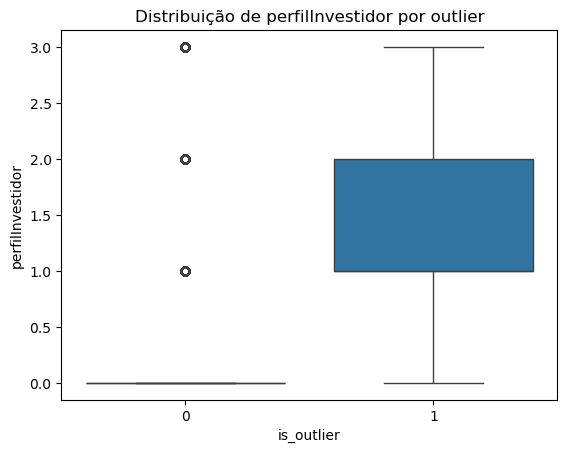

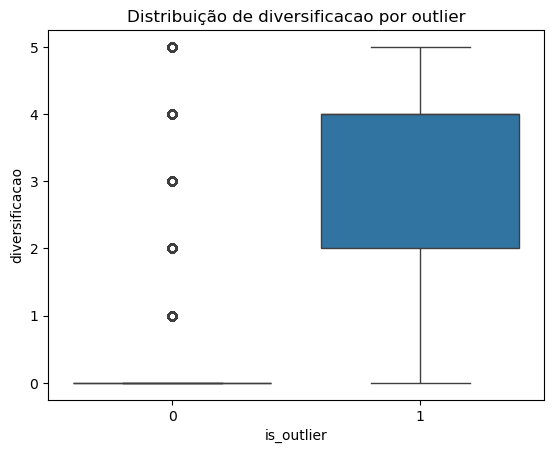

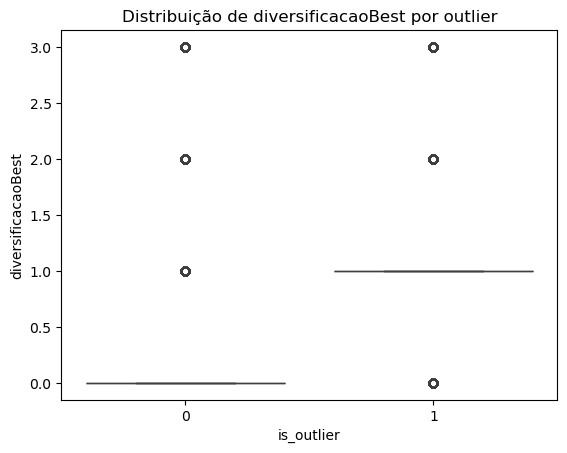

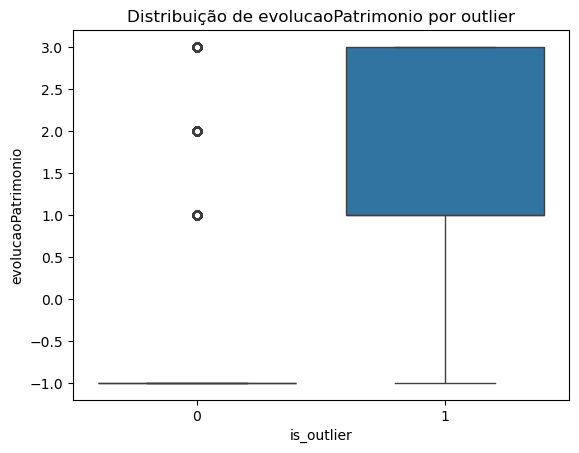

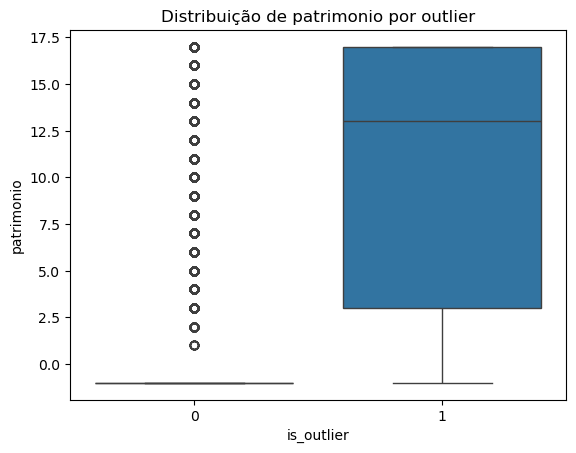

In [ ]:
top_features = top_features_mapeadas["Variável Original"].head(5).tolist()

for col in top_features:
    if col in pandas_df.columns:
        sns.boxplot(x=features_df["is_outlier"], y=pandas_df[col])
        plt.title(f"Distribuição de {col} por outlier")
        plt.show()
    else:
        print(f"Coluna '{col}' não encontrada no DataFrame.")


In [ ]:
outliers_df = features_df[features_df["is_outlier"] == 1]
mean_profile = outliers_df[feature_names].mean().sort_values(ascending=False)
print(mean_profile.head(10))


feature_34    18508.443282
feature_20      108.924688
feature_22       89.501761
feature_19       79.671412
feature_46       19.240884
feature_55        9.928302
feature_45        6.962892
feature_43        6.315420
feature_51        2.880378
feature_47        2.746530
dtype: float64


In [ ]:
X_scaled = StandardScaler().fit_transform(features_df.drop(columns=["is_outlier", "rf_outlier"]))
pca = PCA(n_components=10)
pca.fit(X_scaled)

explained_variance = pd.DataFrame({
    "Componente": [f"PC{i+1}" for i in range(10)],
    "Variância Explicada (%)": pca.explained_variance_ratio_ * 100
})

print(explained_variance)

  Componente  Variância Explicada (%)
0        PC1                 7.908011
1        PC2                 4.913491
2        PC3                 4.744791
3        PC4                 3.566482
4        PC5                 3.281382
5        PC6                 2.271909
6        PC7                 2.056008
7        PC8                 2.024748
8        PC9                 1.991108
9       PC10                 1.765213


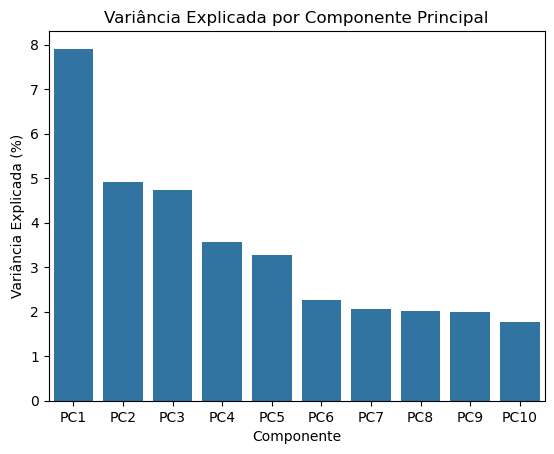

In [ ]:
sns.barplot(x="Componente", y="Variância Explicada (%)", data=explained_variance)
plt.title("Variância Explicada por Componente Principal")
plt.show()

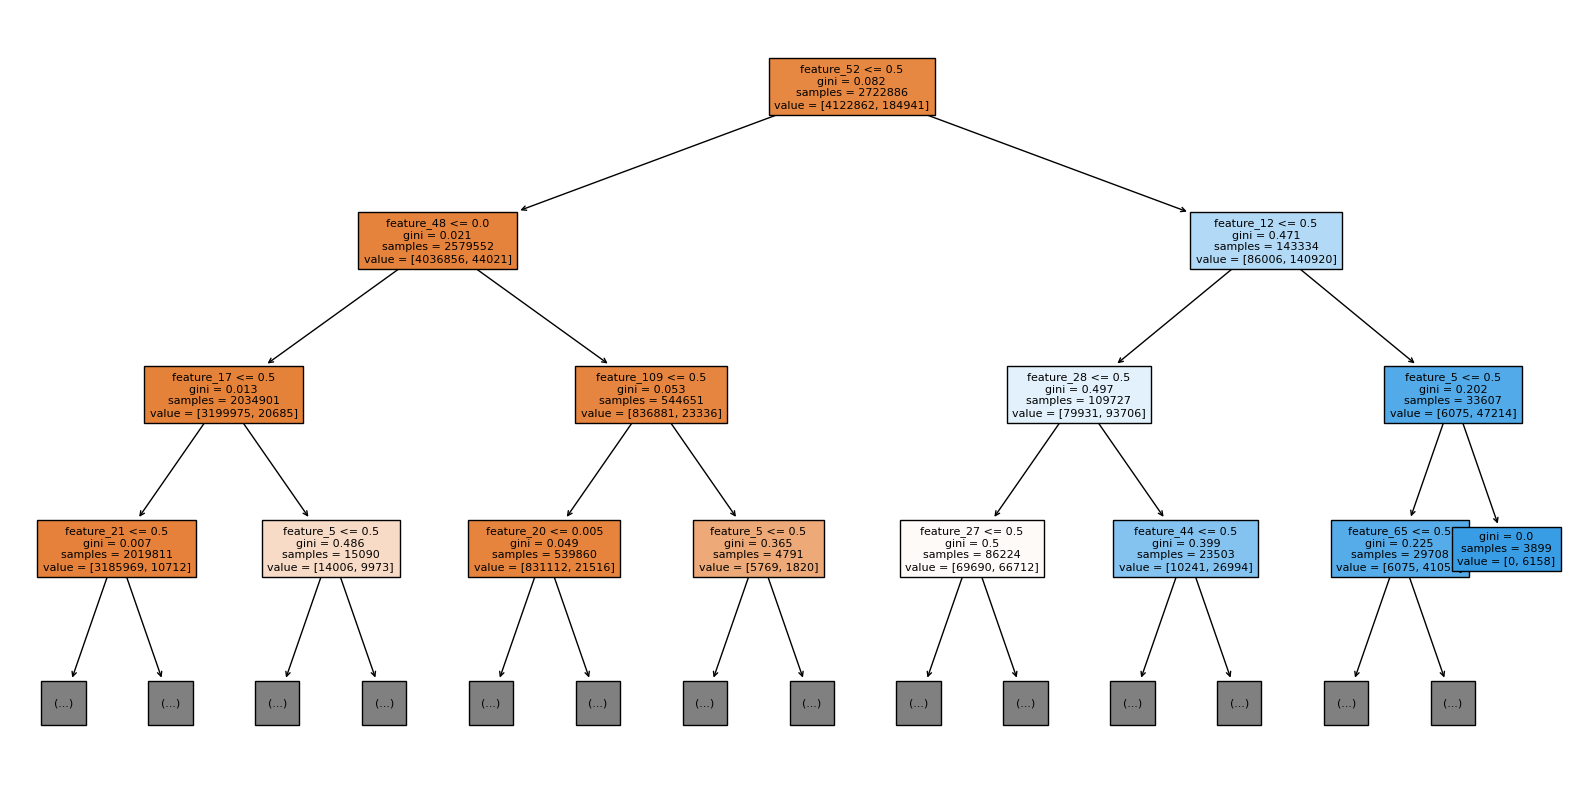

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(rf.estimators_[0], feature_names=feature_names, max_depth=3, filled=True, fontsize=8) # Árvore 1 [índice 0] profundidade 3
plt.show()


In [ ]:
tree_rules = export_text(rf.estimators_[0], feature_names=feature_names, max_depth=3)
print(tree_rules)

|--- feature_52 <= 0.50
|   |--- feature_48 <= 0.00
|   |   |--- feature_17 <= 0.50
|   |   |   |--- feature_21 <= 0.50
|   |   |   |   |--- truncated branch of depth 41
|   |   |   |--- feature_21 >  0.50
|   |   |   |   |--- truncated branch of depth 28
|   |   |--- feature_17 >  0.50
|   |   |   |--- feature_5 <= 0.50
|   |   |   |   |--- truncated branch of depth 35
|   |   |   |--- feature_5 >  0.50
|   |   |   |   |--- truncated branch of depth 31
|   |--- feature_48 >  0.00
|   |   |--- feature_109 <= 0.50
|   |   |   |--- feature_20 <= 0.00
|   |   |   |   |--- truncated branch of depth 43
|   |   |   |--- feature_20 >  0.00
|   |   |   |   |--- truncated branch of depth 31
|   |   |--- feature_109 >  0.50
|   |   |   |--- feature_5 <= 0.50
|   |   |   |   |--- truncated branch of depth 29
|   |   |   |--- feature_5 >  0.50
|   |   |   |   |--- truncated branch of depth 32
|--- feature_52 >  0.50
|   |--- feature_12 <= 0.50
|   |   |--- feature_28 <= 0.50
|   |   |   |--- featu

In [ ]:
top_features = feature_importance_df["Feature"].head(10).values

for feature in top_features:
    outliers = features_df[features_df["is_outlier"] == 1][feature]
    inliers = features_df[features_df["is_outlier"] == 0][feature]

    t_stat, t_p = ttest_ind(outliers, inliers, equal_var=False)
    u_stat, u_p = mannwhitneyu(outliers, inliers, alternative="two-sided")

    print(f"{feature}:\n  T-Test p-value = {t_p:.4f} | U-Test p-value = {u_p:.4f}\n")

feature_56:
  T-Test p-value = 0.0000 | U-Test p-value = 0.0000

feature_51:
  T-Test p-value = 0.0000 | U-Test p-value = 0.0000

feature_52:
  T-Test p-value = 0.0000 | U-Test p-value = 0.0000

feature_54:
  T-Test p-value = 0.0000 | U-Test p-value = 0.0000

feature_55:
  T-Test p-value = 0.0000 | U-Test p-value = 0.0000

feature_46:
  T-Test p-value = 0.0000 | U-Test p-value = 0.0000

feature_45:
  T-Test p-value = 0.0000 | U-Test p-value = 0.0000

feature_43:
  T-Test p-value = 0.0000 | U-Test p-value = 0.0000

feature_47:
  T-Test p-value = 0.0000 | U-Test p-value = 0.0000

feature_12:
  T-Test p-value = 0.0000 | U-Test p-value = 0.0000



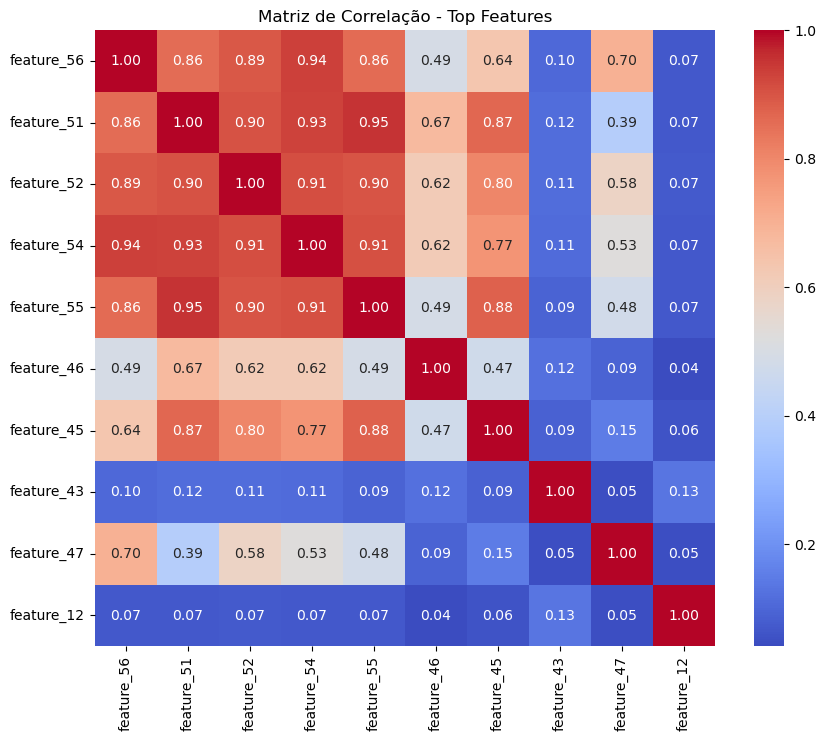

In [ ]:
corr_data = features_df[top_features]

corr_matrix = corr_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação - Top Features")
plt.show()

# Indicadores

In [ ]:
dataset.limit(5).toPandas()

,flagBeneficiarioBPC,flagVulneravelBPC,flagBeneficiarioSeguroDefeso,flagBeneficiarioGarantiaSafra,flagBeneficiarioNovoBolsaFamilia,flagBeneficiarioProgramasSociais,flagAltaQualificacaoBeneficiarioProgramasSociais,indicioFalecimento,flagFalecidoConfirmado,flagSupercentenario,flagAdolescente,flagIdoso,flagEmpresario,flagAltaQualificacao,flagServidorPublico,flagRegistroAntt,flagProdutorRural,quantidadeCandidatosApoiados,quantidadeEleicoesComoDoador,valorMedioDoado,valorTotalDoado,quantidadeDoacoesDescricaoNaoEspecificada,valorMaximoDoado,quantidadeDoacoesPoliticas,flagContratoPublicoBeneficiarioProgramasSociais,flagLaranja,quantidadeEmails,quantidadeEmailPadraoSuspeito,quantidadeEmailNaoConsistenteNomeTitular,flagAreaUrbanaBaixaDensidadeEdificios,flagAglomeradoRural,flagAreaRural,flagFavelaOuComunidadeUrbana,flagDividaDauCresceu180Dias,valorTotalDividasDau,qtdVeiculosFinanciados,qtdFinanciamentosVeicularesQuitados,historicoAtrasoFinanciamentoVeicular,recorrenciaFinanciamentoVeicular,RecorrenciaFinanciamentoMaioridade,flagFinanciamentoImobiliarioAltoValorBeneficiario,flagFinanciamentoImobiliarioAltoValorRenda,quantidadeRestituicaoIrpfObservadas,quantidadeDeclaracoesIrpfObservadas,flagAlterouBancoDeclaracaoIrpfUltimos5Anos,ativosComCota,ativosComCotaPercentual,ativosSemCota,bancarizacao,bancarizacaoBest,bancarizacaoFaixa,diversificacao,diversificacaoBest,diversificacaoFaixa,evolucaoPatrimonio,patrimonio,perfilInvestidor,flagSocioProcessoJudicialLavagemDinheiro,flagProcessoJudicialCorrupcao,flagProcessoJudicialLavagem,flagProcessoJudicialFraude,flagProcessoJudicialRouboFurtos,flagSocioProcessoJudicialFraude,flagProcessoJudicialCobranca,flagSocioProcessoJudicialCorrupcao,flagSocioProcessoJudicialTributario,quantidadeDuplaIdentidadeNomeDataNascimento,flagDuplaIdentidadeNomeDataNascimento,quantidadeDuplaIdentidadeNomeMae,flagDuplaIdentidadeNomeMae,quantidadeDuplaIdentidadeCpfMae,flagDuplaIdentidadeCpfMae,quantidadeIndicioForteDuplaIdentidade,flagIndicioForteDuplaIdentidade,qtdImoveis,valorTotal,flagTop10ValorImoveisRenda,flagTop5ValorImoveisRenda,flagTop1ValorImoveisRenda,flagTop10AltoValorImoveisBeneficiario,flagTop5AltoValorImoveisBeneficiario,flagTop1AltoValorImoveisBeneficiario,quantidadeVeiculosPesados,quantidadeVeiculosPesadosAnoFabricacaoEntre0E4AnosAtras,quantidadeVeiculosPesadosAnoFabricacaoEntre5E9AnosAtras,quantidadeVeiculosPesadosAnoFabricacaoEntre10E14AnosAtras,valorAreaTotalPropriedadesRurais,quantidadePropriedades,quantidadePropriedadesAtivas,flagOperadorAeronave,flagProprietarioAeronave,quantidadeAeronaves,quantidadeRelacionamentos,flagPrimeiroGrauProcessoJudicialCorrupcao,flagPrimeiroGrauProcessoJudicialLavagem,flagPrimeiroGrauProcessoJudicialFraude,flagPrimeiroGrauProcessoJudicialRouboFurtos,flagPrimeiroGrauProcessoJudicialCobranca,flagSegundoGrauProcessoJudicialCorrupcao,flagSegundoGrauProcessoJudicialLavagem,flagSegundoGrauProcessoJudicialFraude,flagSegundoGrauProcessoJudicialRouboFurtos,flagSegundoGrauProcessoJudicialCobranca,flagRendaSemInformacao,flagBaixaRenda,flagMediaRenda,flagAltaRenda,flagSocioDuplaId,quantidadeMediaEmpresasMesmoCnaeAbertas12Meses,flagSocioEmpresasGrandePorte,flagSocioEmpresasEPP,flagSocioBeneficiarioProgramaSocial,flagSocioClasseEmpresaFachadaALTA,flagSocioClasseEmpresaFachadaMUITOALTA,flagSocioClasseEmpresaFachadaMEDIO,quantidadeTelefones
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,-1,-1,0.0,0,0,0,5,0,17,0,-1,3,1,1,4,1,NaN,2,17,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0,0,0,0,0,0,2
1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0,0,0,1,0,1,1,0,0,0,0,0.0,0,0,-1,-1,0.0,0,0,0,3,0,-1,0,-1,-1,-1,-1,0,0,0.0,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0,0,0,0,0,0,3
2,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0.0,0,0,-1,-1,0.0,0,0,0,3,0,-1,0,-1,-1,-1,-1,0,0,0.0,-1,-1,0,0,0,0,0,